In [10]:
import piplite
await piplite.install('seaborn')

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

<center>
<h1>Origine microscopique de la loi de décroissance radioactive</h1>
</center>
<hr />

> L'objectif de cette activité est de réaliser que la **décroissance exponentielle** du nombre de noyaux radioactifs, que l'on constate au **niveau macroscopique**, a pour origine un **phénomène aléatoire au niveau microscopique**.

## La radioactivité

> La radioactivité, terme inventé vers 1898 par Marie Curie, est un **phénomène physique naturel** au cours duquel des *noyaux atomiques instables se désintègrent **spontanément** en d'autres noyaux*, avec dégagement d'énergie sous forme de divers rayonnements.

La radioactivité est un phénomène :
− **aléatoire :** il est impossible de prédire quel noyau va se désintégrer et à quel moment.
− **inéluctable :** tout noyau est destiné à se désintégrer un jour ou l'autre.
− **insensible à l'environnement extérieur :** en particulier, les conditions de température et de pression n'influent pas sur l'aptitude ou pas d'un noyau à se désintégrer.

## Modélisation du phénomène

- *La radioactivité est un **phénomène aléatoire** : la date à laquelle un noyau radioactif se désintègre ne peut pas être prévue*. La seule connaissance que l'on ait est la **probabilité de désintégration par unité de temps** $\lambda$ du noyau étudié.    
De façon similaire, quand on lance un dé, on ne peut pas prévoir le nombre de lancers nécessaires avant d'obtenir un 6. Seule la probabilité d'obtenir cette valeur est connue :
$$
p = \dfrac{1}{6}
$$

- On assimile l'événement « le tirage du dé donne un 6 » à l'événement « le noyau se désintègre entre les dates $t$ et $t + dt$ ».   
Effectuer des tirages d'un ensemble de dés revient alors à observer des noyaux d'un échantillon se désintégrer.

- À l'issue de chaque tirage, on retire les dés ayant donné un 6 car « *un noyau ne peut se désintégrer plus d'une fois* ».

- 20 dés sont lancés en même temps au premier tirage -- *c'est le nombre de noyaux au départ*.

- Chaque tirage correspond à une même durée de comptage (prise égale à l'unité de temps).

- Pour chaque tirage, noter le nombre de 6 obtenus et retirer les dés correspondants du lot.   
En déduire le nombre de dés restants (noyaux non désintégrés).

## 1. Travail expérimental

### 1.1. Travail à effectuer par chaque groupe

1. Effectuer, comme expliqué, une série de 15 tirages et compléter le code Python suivant :

In [11]:
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
N = [20, 19, 18, 15, 14, 9, 9, 7, 7, 7, 6, 3, 3, 3, 2, 2]  # Nombre de noyaux qui restent

2. On cherche à afficher l'évolution du nombre de noyaux au cours du temps.   
Compléter le code Python suivant :

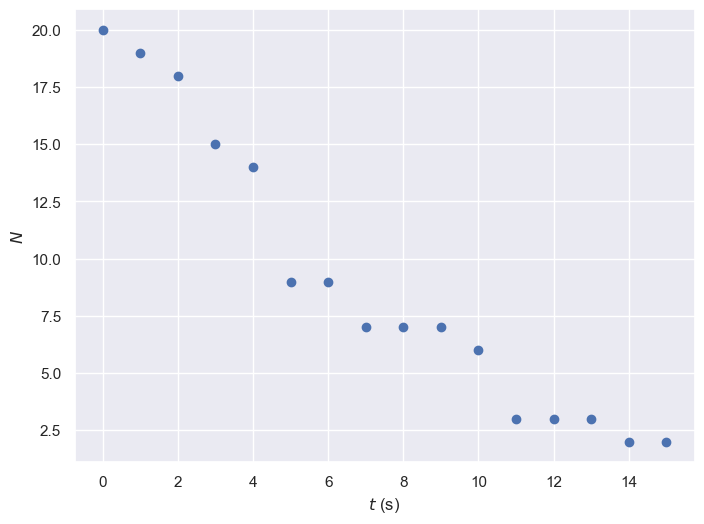

In [12]:
sns.set()
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, N, 'o')
plt.xlabel("$t$ (s)")
plt.ylabel("$N$")
plt.show()

3. L'évolution du nombre de noyaux est-elle exponentielle ? Pourquoi ?

4. Refaire **5 fois de suite** l'expérience décrite à la question 1. et compléter le code suivant :

In [13]:
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
N = [100, 86, 68, 57, 50, 41, 35, 28, 22, 16, 12, 12, 11, 10, 9, 9]  # Nombre de noyaux qui restent

5. On cherche à nouveau à afficher l'évolution du nombre de noyaux au cours du temps.   
Compléter le code Python suivant :

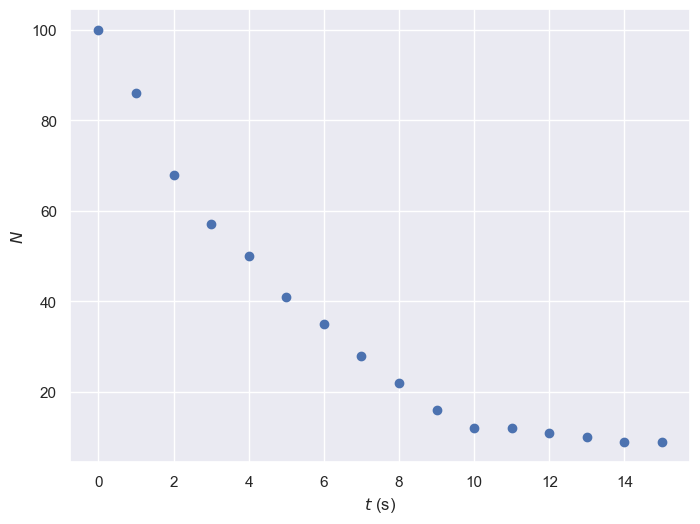

In [14]:
sns.set()
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, N, 'o')
plt.xlabel("$t$ (s)")
plt.ylabel("$N$")
plt.show()

6. Se rapproche-t-on d'une évolution exponentielle pour le nombre de noyaux restant ? Comment pourrait-on encore améliorer les résultats de l'expérience ?

### 1.2. Mise en commun du travail effectué par tous les groupes

7. Mettre en commun les résultats obtenus par tous les groupes et écrire le code Python dans la cellule suivante qui permet d'afficher l'évolution du nombre de noyaux restant $N$ en fonction du temps $t$.

**Remarque :** vous n'avez en fait pratiquement rien à écrire, il suffit de copier-coller le code écrit ci-dessus.

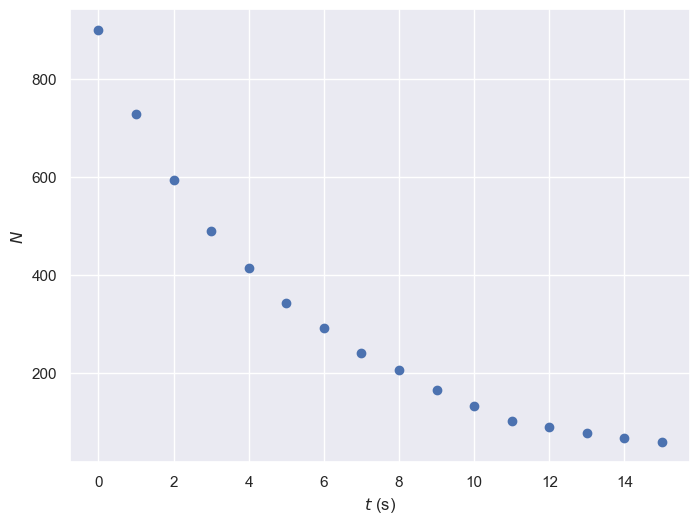

In [15]:
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
N = [900, 729, 593, 489, 413, 343, 291, 241, 205, 164, 131, 101, 88, 76, 67, 59]

sns.set()
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, N, 'o')
plt.xlabel("$t$ (s)")
plt.ylabel("$N$")
plt.show()

7. A-t-on obtenu l'évolution exponentielle pour le nombre de noyaux restant ?

### 1.3. Modélisation de l'évolution du nombre de noyaux restant

Tout le travail expérimental repose sur l'assimilation des événements « le tirage du dé donne un 6 » et « le noyau se désintègre entre les dates $t$ et $t + dt$ ». Si cette dernière est correcte, l'évolution du nombre de noyaux restant, *démontrée dans le cours*,
$$
N(t) = N_0 e^{-\lambda t}
$$
doit donc être égale à 
$$
N(t) = N_0 e^{-p t}
$$
avec 
$$
p = \dfrac{1}{6}
$$

> L'objectif de cette partie est de vérifier l'hypothèse ci-dessus en modélisant la courbe expérimentale.

8. Exécuter le code Python suivant et noter la valeur des paramètres $N_0$ et $p$ donnés par la modélisation.

**Remarque :** La modélisation de fonctions non-linéaires n'est pas une opération triviale... et n'est pas aussi précise que la modélisation d'une fonction linéaire. C'est donc $\log(N)$ et non pas $N$ que l'on modélise.    
Montrer que 
$$
\log(N) = A - p t
$$
avec $A=\log (N_0)$.

In [16]:
# Nouvelles dates pour l'affichage des grandeurs modélisées
t_mod = np.linspace(min(t), max(t), 16)

# Fonction modèle pour le comportement de N en fonction de t
def modele_log_N(t, A, p):
    return A - p * t

# Détermination des paramètres optimaux pour N en fonction de t
popt, pcov = curve_fit(modele_log_N, t, np.log(N))
N0_mod = np.exp(popt[0])
p_mod = popt[1]

# Valeurs de N modélisées
N_mod = N0_mod * np.exp(-p_mod * t_mod)

# Affichage valeurs des paramètres
print(f"N0 = {N0_mod}")
print(f"p = {p_mod}")

N0 = 871.1139373452559
p = 0.18601621997341392


9. Compléter le code suivant. L'objectif est d'afficher $N(t)$ et $N_{mod}(t_{mod})$.

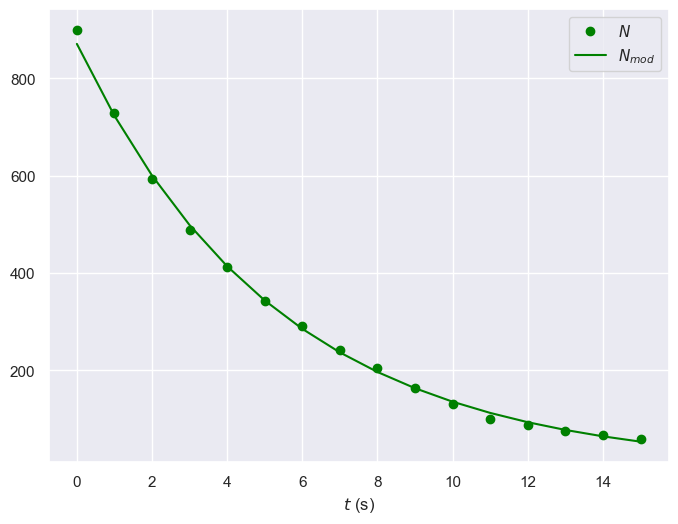

In [17]:
sns.set()
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, N, 'o', label="$N$", color="green")
plt.plot(t_mod, N_mod, '-', label="$N_{mod}$", color="green")
plt.xlabel("$t$ (s)")
plt.legend()
plt.show()

10. La valeur obtenue pour $p$ est-elle cohérente avec celle attendue ?

## 2. Simulation

Il est possible de simuler en Python l'expérience réalisée avec les dés. On peut alors choisir le nombre de noyaux que l'on souhaite ainsi que la probabilité de désintégration.

Le code ci-dessous permet une telle simulation. Modifier les paramètres et l'éxécuter.

**ATTENTION :** la complexité de l'algorithme est en $O(N^2)$. Si la valeur de $N_0$ est multipliée par 10, le temps de calcul peut être multiplié par 100 !

[10000000, 8333156, 6944363, 5788375, 4822901, 4019351, 3350652, 2793470, 2328408, 1940612, 1617123, 1347447, 1122864, 935508, 779845, 649962, 541323, 451200, 375807, 313157, 261188, 217507, 181252, 151378, 126244, 105295, 87639, 72992, 60932, 50676, 42362, 35267, 29254, 24341, 20285, 16782, 13989, 11613, 9689, 8059, 6640, 5502, 4573, 3806, 3174, 2655, 2205, 1840, 1541, 1303, 1092, 911, 781, 646, 536, 445, 371, 308, 251, 215, 183, 159, 133, 119, 99, 82, 73, 67, 56, 43]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


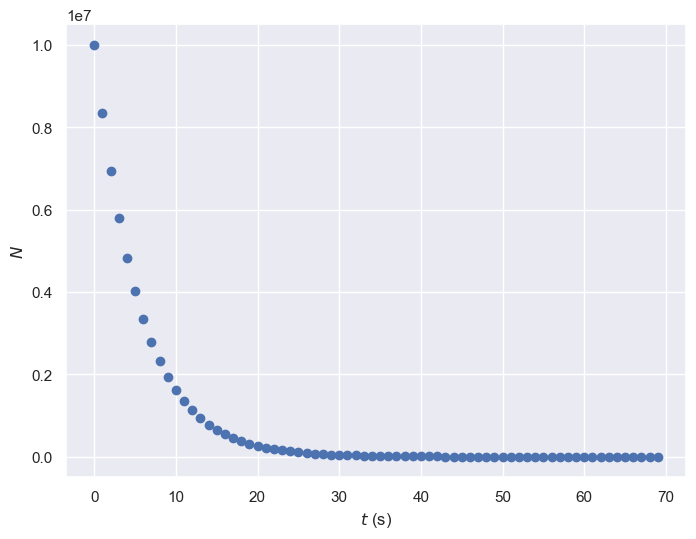

In [21]:
from random import randint
from typing import List


def nbre_desintegrations(N: int, p: int) -> int:
    """
    Détermine le nombre de désintégrations entre les 
    instants t et t + 𝛥t.
    """
    n = 0
    for i in range(N):
        des = randint(1, p)
        if des == 1:  # 1 signifie "se désintègre"
            n += 1
    return n


def affichage(x: List[int], y: List[int]) -> None:
    """
    Réalise l'affichage.
    """
    sns.set()
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x, y, 'o')
    plt.xlabel("$t$ (s)")
    plt.ylabel("$N$")
    plt.show()



N0 = int(10e6)    # Nombre initial de noyaux radioactifs
N_lim = int(50)  # Nombre de noyaux considéré nul
N = [N0]         # Nombre de noyaux restant
t = [0]          # Dates
p = 6            # Inverse de la probabilité pour qu'un noyau se désintègre chaque seconde

while N[-1] > N_lim:
    delta_N = nbre_desintegrations(N[-1], p)
    N.append(N[-1] - delta_N)
    t.append(t[-1] + 1)

print(N)
print(t)
affichage(t, N)